# Business problem

### Title: Optimizing Credit Risk Assessment for Financial Institutions

#### Objective:
Develop and evaluate machine learning models to predict the Probability of Default (PD) for loan applicants. These models will use application data (e.g., income, loan amount, previous defaults) and behavioral data (e.g., payment history, credit utilization) to provide a reliable PD estimate. The solution aims to enhance the credit risk assessment process, allowing financial institutions to make data-driven decisions and optimize their loan portfolios.

#### Problem Statement:
Financial institutions need a reliable and efficient method to calculate the Probability of Default (PD) for loan applicants. This metric helps in evaluating the credit risk associated with each applicant and making informed decisions. The challenge lies in accurately predicting PD using diverse data sources, such as application data and behavioral data, and integrating this prediction into the decision-making process to reduce the risk of default while maximizing profitability.




Data Collection and Preparation: Gather two dataset, application data (demographic and financial information of applicants) and Behavioral data (historical payment and credit utilization patterns). Preprocess the data to handle missing values, encode categorical variables, and normalize numerical features.


Model Development: Implement a Gradient Boosting method and a random forret model.


Model Evaluation: Split the data into training and testing sets to evaluate model performance. Use metrics such as AUC-ROC, precision, recall, and F1-score to assess the accuracy and reliability of the models.


Business Integration: Develop a scoring system based on the predicted PD to categorize applicants into different risk levels (e.g., low, medium, high).
Integrate the scoring system into the loan approval process, enabling financial institutions to make informed decisions.
Implement business rules alongside the model predictions to ensure compliance with regulatory requirements and risk management policies.


Performance Monitoring and Maintenance: Continuously monitor model performance using real-world data to detect any drift or degradation in predictive accuracy. Update the models periodically with new data to maintain their relevance and accuracy. Provide a feedback loop to incorporate insights from loan performance and refine the models further.

# Step 1 - Data Cleaning

In [1]:
import pandas as pd


cr_data = pd.read_csv('cr_loan2.csv')
cr_data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [2]:
cr_data.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [3]:
#summary statistics of numerical data
cr_data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [4]:
#summary statistics of numerical data
cr_data.describe(include="O")

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


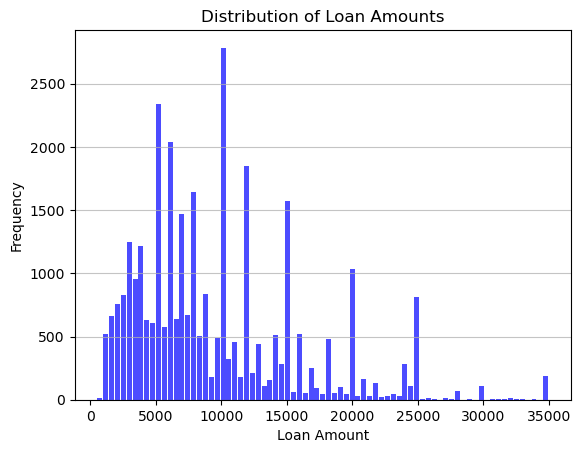

In [5]:
import matplotlib.pyplot as plt


n, bins, patches = plt.hist(x=cr_data['loan_amnt'], bins='auto', color='blue', alpha=0.7, rwidth=0.85)
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Loan Amounts")
plt.grid(axis='y', alpha=0.75)
plt.show()

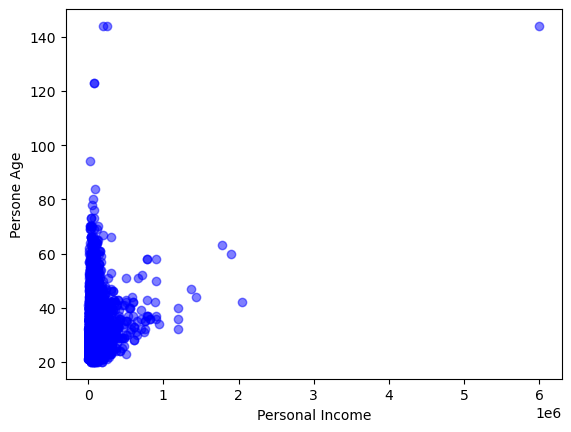

In [6]:
# Plot a scatter plot of income against age
plt.scatter(cr_data['person_income'], cr_data['person_age'],c='blue', alpha=0.5)
plt.xlabel('Personal Income')
plt.ylabel('Persone Age')
plt.show()

In [7]:
# Create a cross table of the loan intent and loan status
print(pd.crosstab(cr_data['loan_intent'], cr_data['loan_status'], margins = True))

loan_status            0     1    All
loan_intent                          
DEBTCONSOLIDATION   3722  1490   5212
EDUCATION           5342  1111   6453
HOMEIMPROVEMENT     2664   941   3605
MEDICAL             4450  1621   6071
PERSONAL            4423  1098   5521
VENTURE             4872   847   5719
All                25473  7108  32581


In [8]:
# Create a cross table of home ownership, loan status, and grade
print(pd.crosstab(cr_data['person_home_ownership'],[cr_data['loan_status'],cr_data['loan_grade']]))

loan_status               0                                 1             \
loan_grade                A     B     C    D    E   F  G    A     B    C   
person_home_ownership                                                      
MORTGAGE               5219  3729  1934  658  178  36  0  239   324  321   
OTHER                    23    29    11    9    2   0  0    3     5    6   
OWN                     860   770   464  264   26   7  0   66    34   31   
RENT                   3602  4222  2710  554  137  28  1  765  1338  981   

loan_status                               
loan_grade                D    E   F   G  
person_home_ownership                     
MORTGAGE                553  161  61  31  
OTHER                    11    6   2   0  
OWN                      18   31   8   5  
RENT                   1559  423  99  27  


In [9]:

# Create a cross table of home ownership, loan status, and average percent income
print(pd.crosstab(cr_data['person_home_ownership'], cr_data['loan_status'],
              values=cr_data['loan_percent_income'], aggfunc= 'mean'))

loan_status                   0         1
person_home_ownership                    
MORTGAGE               0.146504  0.184882
OTHER                  0.143784  0.300000
OWN                    0.180013  0.297358
RENT                   0.144611  0.264859


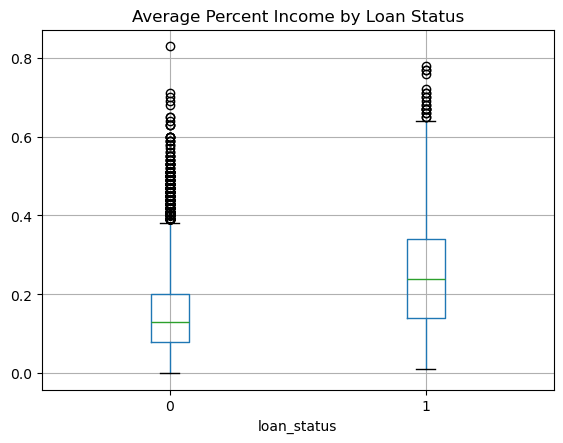

In [10]:
# Create a box plot of percentage income by loan status
cr_data.boxplot(column = ['loan_percent_income'], by = 'loan_status')
plt.title('Average Percent Income by Loan Status')
plt.suptitle('')
plt.show()

# Step 2 - Data Preprocessing

In [11]:
# Create the cross table for loan status, home ownership, and the max employment length
print(pd.crosstab(cr_data['loan_status'],cr_data['person_home_ownership'],
        values=cr_data['person_emp_length'], aggfunc=max))

cr_data.shape

person_home_ownership  MORTGAGE  OTHER   OWN   RENT
loan_status                                        
0                         123.0   24.0  31.0   41.0
1                          34.0   11.0  17.0  123.0


C:\Users\Prisca\AppData\Local\Temp\ipykernel_11532\4116357301.py:2: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  print(pd.crosstab(cr_data['loan_status'],cr_data['person_home_ownership'],


(32581, 12)

Looking through this data, we can see that we have an outlier 123, since no one can be employed for upto 123 years , we will set the max employment year at 60 years.

In [12]:
# Create an array of indices where employment length is greater than 60
indices = cr_data[cr_data['person_emp_length'] > 60].index



# Drop the records from the data based on the indices and create a new dataframe
cr_data_new= cr_data.drop(indices)
cr_data_new.shape

(32579, 12)

In [13]:
# I will also tale a look at the minimum values for the employment length as well
print(pd.crosstab(cr_data_new['loan_status'],cr_data_new['person_home_ownership'],
        values=cr_data_new['person_emp_length'], aggfunc=['min','max']))

                           min                      max                  
person_home_ownership MORTGAGE OTHER  OWN RENT MORTGAGE OTHER   OWN  RENT
loan_status                                                              
0                          0.0   0.0  0.0  0.0     38.0  24.0  31.0  41.0
1                          0.0   0.0  0.0  0.0     34.0  11.0  17.0  27.0


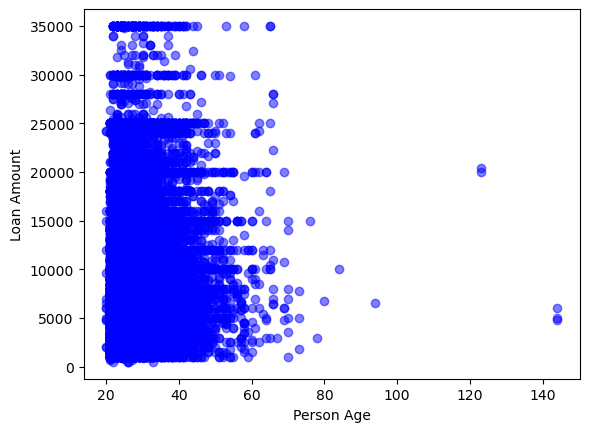

In [14]:
# Create the scatter plot for age and amount
plt.scatter(cr_data_new['person_age'], cr_data_new['loan_amnt'],c='blue', alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()

In [15]:
# Looking through the data, we can see that we have some outliers in person age, so we drop age > 100
cr_data_maxage = cr_data_new.drop(cr_data[cr_data['person_age'] > 90].index)
cr_data_maxage.shape

(32573, 12)

Loan status - active and paid off, 0 & 1 (still figuring this out)

Handle missing data 
Replace them
Or drop them

In [16]:
#We can check for missing values in two ways
cr_data_maxage.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3114
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

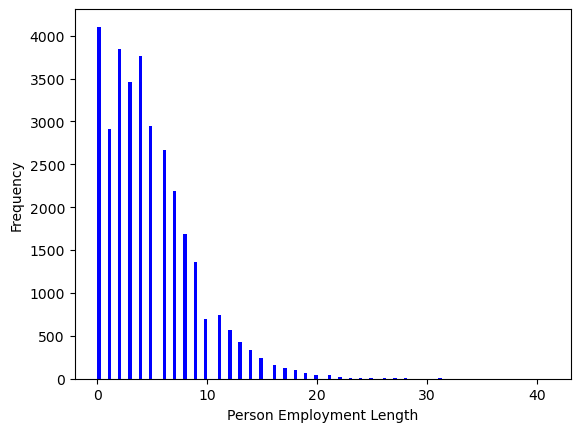

In [17]:
# Impute the null values with the median value for all employment lengths
cr_data_maxage['person_emp_length'].fillna((cr_data_maxage['person_emp_length'].median()), inplace=True)


# Create a histogram of employment length
n, bins, patches = plt.hist(cr_data_maxage['person_emp_length'], bins='auto', color='blue')
plt.xlabel("Person Employment Length")
plt.ylabel("Frequency")
plt.show()

In [18]:
#now lets check for the remaining missing values

# Print the number of nulls
print(cr_data_maxage['loan_int_rate'].isnull().sum())

3114


In [19]:
# Store the array on indices
indices= cr_data_maxage[cr_data_maxage['loan_int_rate'].isnull()].index

# Save the new data without missing data
cr_data_clean = cr_data_maxage.drop(indices)
cr_data_clean.shape

(29459, 12)

In [20]:
cr_data_clean.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


In [21]:
cr_data_clean['cb_person_cred_hist_length'].unique()

array([ 2,  3,  4,  8,  7,  6,  9, 10,  5, 11, 15, 17, 12, 13, 14, 16, 28,
       27, 22, 19, 29, 23, 26, 20, 21, 30, 25, 24, 18], dtype=int64)

### Feature Engineering  & Feature Selection 


1. The most fundamental characteristics most prospective lenders will concentrate on include:

2. Credit history

3. Cash flow history and projections for the business

4. Collateral available to secure the loan

5. Character

6. Myriad pieces of loan documentation that includes business and personal financial statements, income tax returns, a business plan and that essentially sums up and provides evidence for the first four it

In choosing the best predictor variables for your logistic regression model, there are a number of ways, using stepwise algorithm  or statistical analysis. In this project, I will focus on using Chisquare test for the numerical variables and the anova for the categorical variables.

In the categorical variable, I will use ordinal encoding for the person default on file, loan_grade and home_ownership while I will use one-hot encoding for loan_intent.

https://www.wolterskluwer.com/en/expert-insights/what-banks-look-for-when-reviewing-a-loan-applicationems 

In [141]:
def loan_default(x):
    if x == 'N':
        return 0
    else:
        return 1
        
#apply the function
cr_data_clean['previous_default'] = cr_data_clean['cb_person_default_on_file'].apply(loan_default)


def classify_grade(x):
    if x in ['A', 'B', 'C', 'D', 'E', 'F', 'G']:
        return ord(x) - ord('A')
    else:
        return None
        
#apply function
cr_data_clean['loan_grade_ord'] = cr_data_clean['loan_grade'].apply(classify_grade) 


def home_ownership(x):
    if x == 'OWN':
        return 0
    elif x == 'MORTGAGE':
        return 1
    elif x == 'RENT':
        return 2
    else:
        return 3

        
#apply the function
cr_data_clean['home_ownership'] = cr_data_clean['person_home_ownership'].apply(home_ownership)

cr_data_clean.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_default,loan_grade_ord,home_ownership,previous_default
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,0,1,0,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,0,2,1,0
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,0,2,2,0
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,1,2,2,1
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,0,0,0,0


In [142]:
print(cr_data_clean.shape)
cr_data_ord = cr_data_clean.drop(['person_home_ownership','cb_person_default_on_file','loan_grade'], axis = 1)
print(cr_data_ord.shape)

(29459, 16)
(29459, 13)


In [143]:

intent_onehot = pd.get_dummies(cr_data_ord['loan_intent']).astype(int)

cr_data_one_hot = cr_data_ord.drop(['loan_intent'], axis = 1)

# Concatenate numeric and one-hot encoded categorical columns
data_prep = pd.concat([cr_data_one_hot, intent_onehot], axis=1)

# Print the columns in the new data set
data_prep.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_default,loan_grade_ord,home_ownership,previous_default,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
1,21,9600,5.0,1000,11.14,0,0.10,2,0,1,0,0,0,1,0,0,0,0
2,25,9600,1.0,5500,12.87,1,0.57,3,0,2,1,0,0,0,0,1,0,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,2,2,0,0,0,0,1,0,0
4,24,54400,8.0,35000,14.27,1,0.55,4,1,2,2,1,0,0,0,1,0,0
5,21,9900,2.0,2500,7.14,1,0.25,2,0,0,0,0,0,0,0,0,0,1


In [144]:
from scipy.stats import chi2_contingency, f_oneway

def chi_square_test(data, categorical_features, target_variable):
    chi2_results = {}
    for feature in categorical_features:
        contingency_table = pd.crosstab(data[feature], data[target_variable])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        chi2_results[feature] = {'chi2': chi2, 'p_value': p}
    return chi2_results

# Example usage:
chi2_results = chi_square_test(data_prep, categorical_features=['person_default','loan_grade_ord','home_ownership','DEBTCONSOLIDATION','EDUCATION','HOMEIMPROVEMENT','MEDICAL','PERSONAL','VENTURE'], target_variable='loan_status')

print(chi2_results)

{'person_default': {'chi2': 953.6712331099756, 'p_value': 2.1120756558054497e-209}, 'loan_grade_ord': {'chi2': 5155.172341452008, 'p_value': 0.0}, 'home_ownership': {'chi2': 1744.0148453397003, 'p_value': 0.0}, 'DEBTCONSOLIDATION': {'chi2': 145.40187377357097, 'p_value': 1.7542931921207515e-33}, 'EDUCATION': {'chi2': 92.37097360141397, 'p_value': 7.186038466376035e-22}, 'HOMEIMPROVEMENT': {'chi2': 39.55689650525326, 'p_value': 3.186391646159603e-10}, 'MEDICAL': {'chi2': 99.11935531728395, 'p_value': 2.377333659887463e-23}, 'PERSONAL': {'chi2': 11.391924175723439, 'p_value': 0.0007376408393224189}, 'VENTURE': {'chi2': 184.60997131932737, 'p_value': 4.774689123801774e-42}}


In [145]:
def anova_test(data, continuous_features, target_variable):
    anova_results = {}
    for feature in continuous_features:
        group_data = [group[1][feature].values for group in data.groupby(target_variable)]
        f_stat, p = f_oneway(*group_data)
        anova_results[feature] = {'F-statistic': f_stat, 'p_value': p}
    return anova_results

anova_results = anova_test(data_prep, continuous_features=['person_age','person_income','person_emp_length','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length'], target_variable='loan_amnt')

print(anova_results)

C:\Users\Prisca\anaconda\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


{'person_age': {'F-statistic': 1.3420727713546476, 'p_value': 2.5930629363738966e-09}, 'person_income': {'F-statistic': 7.587856728330774, 'p_value': 0.0}, 'person_emp_length': {'F-statistic': 1.6339576140075365, 'p_value': 4.135457892465545e-24}, 'loan_amnt': {'F-statistic': inf, 'p_value': 0.0}, 'loan_int_rate': {'F-statistic': 2.709068815255633, 'p_value': 4.0868224421725345e-110}, 'loan_percent_income': {'F-statistic': 29.515563627727996, 'p_value': 0.0}, 'cb_person_cred_hist_length': {'F-statistic': 1.2879431726885762, 'p_value': 2.9818397208956293e-07}}


In [146]:
from sklearn.model_selection import train_test_split
import numpy as np


# Create the X and y data sets
xx=data_prep.drop(columns = 'loan_status')
yy = data_prep[['loan_status']]

# Use test_train_split to create the training and test sets
xx_train, xx_test, y_train, y_test = train_test_split(xx, np.ravel(yy), test_size=.2, random_state=123)

print("Shape of xx_train:", xx_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of xx_train: (23567, 17)
Shape of y_train: (23567,)


Correlation Matrix:


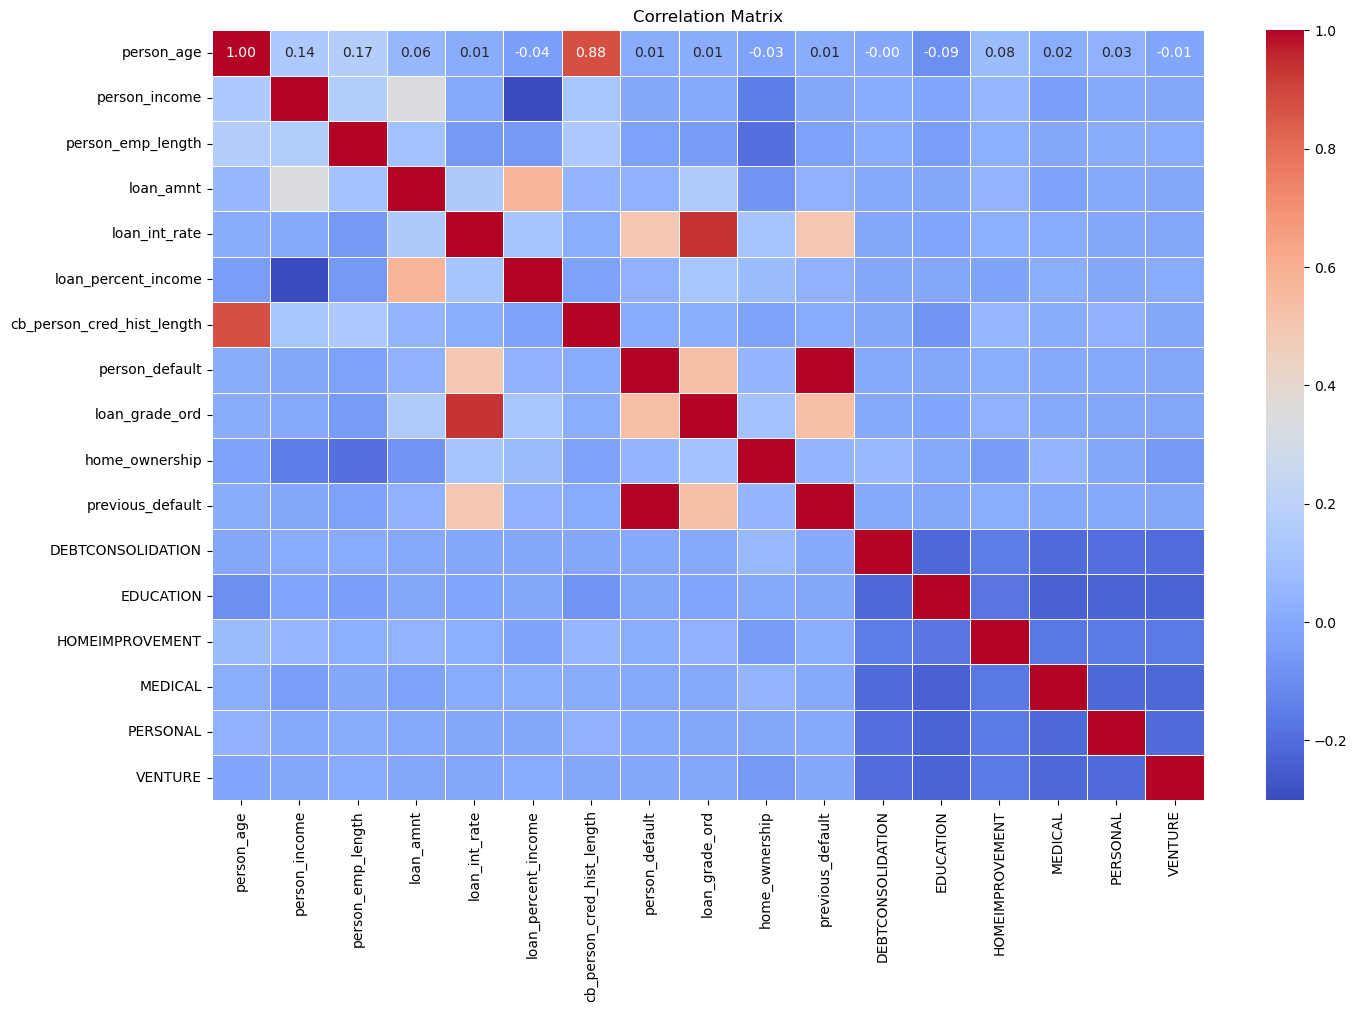

In [147]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = xx_train.corr()

# Display the correlation matrix
print("Correlation Matrix:")
#print(correlation_matrix)

# Visualize the correlation matrix 
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Note: A good p-value is from 0.05 to 0 i.e the closer to 0, the better. Then, the interpretation of the F-statistic and the Chi-square values should be done in conjunction with the p-values, the higher their values, the better. 

Values with high correlation can cause a model to be overfit,  So, I will remove loan_grade_ord and person_age 

With that in mind, and the focus of financial institutions, the columns that I am going to use in this project are:
['previous_default', 'home_ownership' ,  'person_income' , 'loan_amnt' 'loan_int_rate': 'loan_percent_income']

In [149]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

x = data_prep[['previous_default','home_ownership' , 'person_income' , 'loan_amnt', 'loan_int_rate', 'loan_percent_income']]
yy = data_prep[['loan_status']]

# Use test_train_split to create the training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, np.ravel(yy), test_size=.2, random_state=123)


#scale the data
#Initialize the scaler
#scaler = MinMaxScaler()
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (23567, 6)
Shape of y_train: (23567,)


## STEP 3: BUILD THE MODELS

Probability of default is the likelihood that someone will fail to repay a loan. This is expressed as a probability which is a value between zero and one. These probabilities are associated with our loan status column where a 1 is a default(yes), and a 0 is a non-default(no). The resulting predictions give us probabilities of default. The closer the value is to 1, the higher the probability of the loan being a default.

I willl use random fores and Gradient Boosting Machine as they are the best classification models to use for medium sized datasets ( i.e 1000 - 100000 rows and 20- 100 columns), binary classification models.

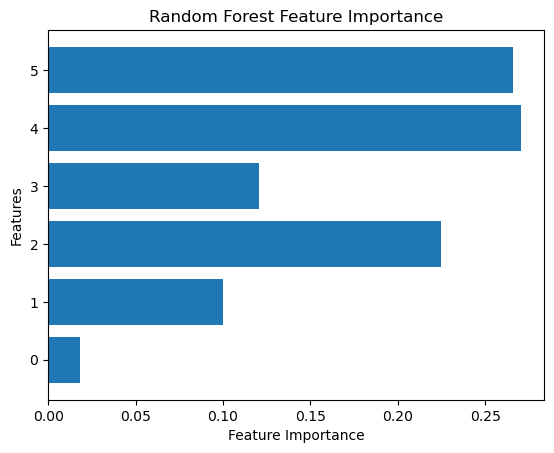

In [150]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Plot the feature importance
importance = rf.feature_importances_
plt.barh(range(x.shape[1]), importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()

In [151]:
from sklearn.ensemble import GradientBoostingClassifier


gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [152]:
#make predictions

rf_pred = rf.predict(X_test)
rf_proba = rf.predict_proba(X_test)[:, 1]

gb_pred = gb.predict(X_test)
gb_proba = gb.predict_proba(X_test)[:, 1]

## STEP 4: VALIDATE THE MODELS

RANDOM FOREST
              precision    recall  f1-score   support

           0       0.96      0.91      0.94      4895
           1       0.66      0.83      0.73       997

    accuracy                           0.90      5892
   macro avg       0.81      0.87      0.84      5892
weighted avg       0.91      0.90      0.90      5892

Confusion Matrix:
[[4463  168]
 [ 432  829]]


GRADIENT BOOSTING MACHINES
              precision    recall  f1-score   support

           0       0.97      0.90      0.94      4960
           1       0.62      0.84      0.72       932

    accuracy                           0.89      5892
   macro avg       0.80      0.87      0.83      5892
weighted avg       0.91      0.89      0.90      5892

Confusion Matrix:
[[4486  145]
 [ 474  787]]




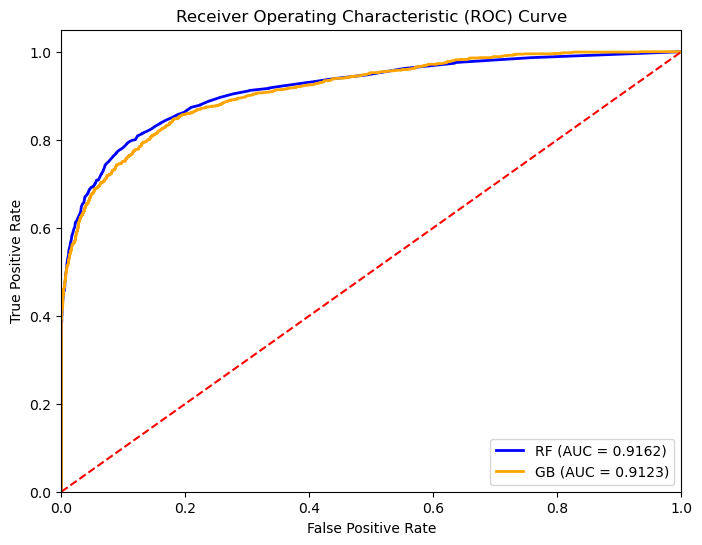

In [153]:
#Evaluate the model
import numpy as np
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, accuracy_score, roc_curve, auc, classification_report
from sklearn.metrics import log_loss


print("RANDOM FOREST")

f1 = f1_score(y_test, rf_pred, average='macro')
conf_matrix = confusion_matrix(y_test, rf_pred)
roc_auc_rf = roc_auc_score(y_test,rf_proba)

print(classification_report(rf_pred, y_test))
print("Confusion Matrix:")
print(conf_matrix)

#Compute ROC curve
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, rf_proba)

# Compute AUC
roc_auc_crlog = auc(crlog_fpr, crlog_tpr)

print('\n')


print("GRADIENT BOOSTING MACHINES")

f1 = f1_score(y_test, gb_pred, average='macro')
conf_matrix = confusion_matrix(y_test, gb_pred)
print(classification_report(gb_pred, y_test))
print("Confusion Matrix:")
print(conf_matrix)

#Compute ROC curve
gb_fpr, gb_tpr, thresholds = roc_curve(y_test, gb_proba)

# Compute AUC
roc_auc_gb = auc(gb_fpr, gb_tpr)
print('\n')


# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, color='blue', lw=2, label=f'RF (AUC = {roc_auc_rf:.4f})')
plt.plot(gb_fpr, gb_tpr, color='orange', lw=2, label=f'GB (AUC = {roc_auc_gb:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

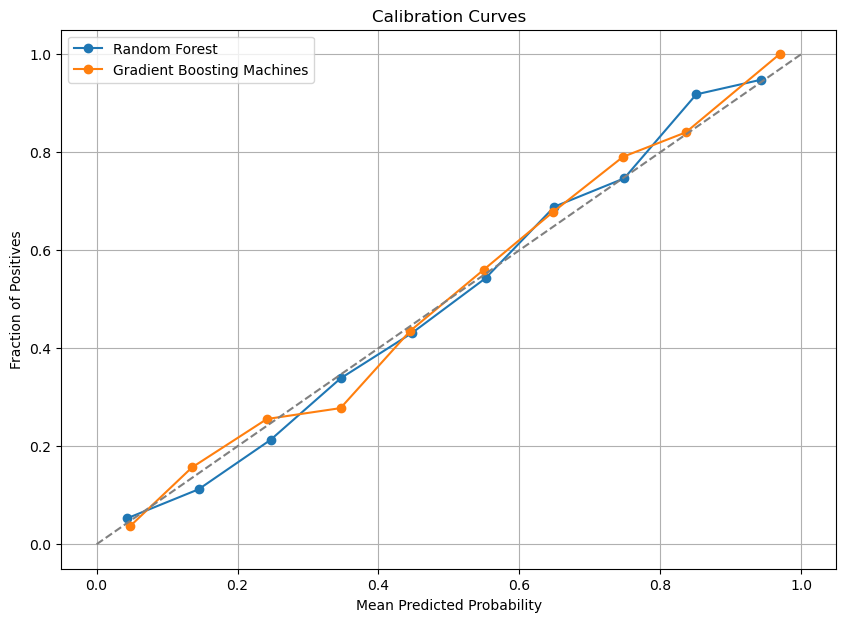

In [154]:
from sklearn.calibration import calibration_curve

# Plot calibration curves
plt.figure(figsize=(10, 7))

# Calibration curve for Random Forest
prob_true_rf, prob_pred_rf = calibration_curve(y_test, rf_proba, n_bins=10)
plt.plot(prob_pred_logit, prob_true_logit, marker='o', label='Random Forest')

# Calibration curve for Gradient Boosted
prob_true_gb, prob_pred_gb = calibration_curve(y_test, gb_proba, n_bins=10)
plt.plot(prob_pred_gb, prob_true_gb, marker='o', label='Gradient Boosting Machines')



# Plot the perfect calibration line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curves')
plt.legend()
plt.grid()
plt.show()

The F1 score for both of the models are the same, but the AUC of the Random Forest is slightly higher than that of the Gradient Boosing Machine. Also the lift chart of the Random Forest is slightly higher in both the ROC curve and the calibration curve. So, the Random Forest model performed better.

https://levelup.gitconnected.com/everything-you-need-to-know-about-receiver-operating-characteristic-roc-curve-in-machine-learning-5191aecde751

In [162]:
import pickle
pickle.dump(rf, open("cr_model.pkt", "wb"))

## STEP 5: CREDIT ACCEPTANCE RATE

In [156]:
#Create a DataFrame from the predicted probabilities
pred_df = pd.DataFrame(rf_proba, columns=['prob_default'])
pred_df['prob_default'] = (pred_df['prob_default']).map('{:.2f}'.format)

# Add the predicted loan status to the DataFrame
pred_df['pred_loanstatus'] = cr_logit_pred

# Add the initial loan status to the DataFrame
pred_df['initial_loanstatus'] = y_test

pred_df.head()

,prob_default,pred_loanstatus,initial_loanstatus
0,1.00,1,1
1,0.56,1,1
2,0.02,0,0
3,0.06,0,0
4,0.03,0,1


Threshold: 0.58
predicted_loan85
0    5016
1     876
Name: count, dtype: int64


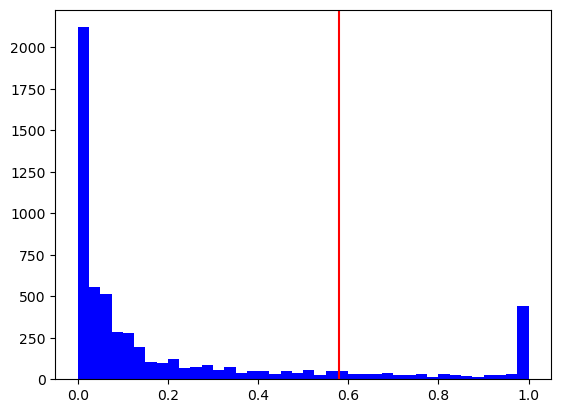

Bad rate: 0.10


In [157]:
#convert to numeric
pred_df['prob_default'] = pd.to_numeric(pred_df['prob_default'], errors='coerce')

#print(pred_df['prob_default'].describe())

# Calculate the threshold for a 85% acceptance rate
threshold_85 = np.quantile(pred_df['prob_default'], 0.85)
print('Threshold:',threshold_85)

# Apply acceptance rate threshold
#pred_df['predicted_loan85'] = pred_df['prob_default'].apply(lambda x: 1 if x > threshold_85 else 0)
pred_df['predicted_loan85'] = np.where(pred_df['prob_default'] > threshold_85, 1, 0)
print(pred_df['predicted_loan85'].value_counts())
#print(pred_df['pred_loanstatus'].value_counts())

# Plot the predicted probabilities of default
plt.hist(pred_df['prob_default'], color = 'blue', bins = 40)

# Add a reference line to the plot for the threshold
plt.axvline(x = threshold_85, color = 'red')
plt.show()

# Calculate the bad rate(high PD at Threshold 85
#Create a subset of only accepted loans
accepted_loans = pred_df[pred_df['predicted_loan85'] == 0]
bad_rate = np.sum(accepted_loans['initial_loanstatus']) / accepted_loans['initial_loanstatus'].count()
bad_rate = '{:.2f}'.format(bad_rate)
print('Bad rate:',bad_rate)

In [158]:
#Add loan amount to the dataframe
sumn = x_test['loan_amnt']

pred_df['loan_amount'] = x_test.loc[:, 'loan_amnt'].values
pred_df.head()

# Print the statistics of the loan amount column
#print(pred_df['loan_amount'].describe())

# Store the average loan amount
avg_loan = np.mean(pred_df['loan_amount'])

# Average loan amount for initial loan status and the predicted loan at 85% threshold
pd.options.display.float_format = '${:,.2f}'.format
print(pd.crosstab(pred_df['initial_loanstatus'], pred_df['pred_loanstatus']).apply(lambda x: x * avg_loan, axis = 0))

pred_loanstatus                 0             1
initial_loanstatus                             
0                  $41,930,822.68 $2,151,274.90
1                   $6,501,419.27 $5,501,933.15


## STEP 6: CREDIT STRATEGY

[1.0, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]


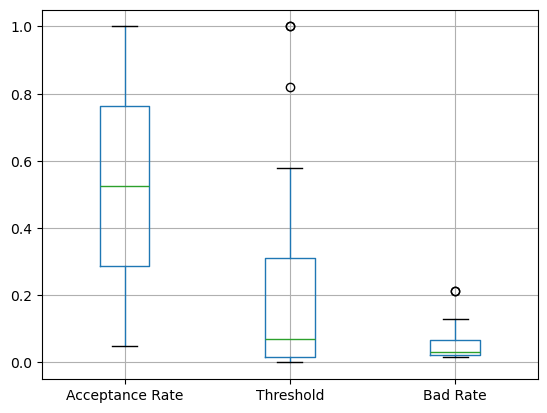

,Acceptance Rate,Threshold,Bad Rate,Num Accepted Loans,Avg Loan Amnt,Estimated Value
0,1.000000,1.000000,0.214000,5892,"$9,518.92","$32,080,892.64"
1,0.950000,1.000000,0.214000,5892,"$9,518.92","$32,080,892.64"
2,0.900000,0.820000,0.130000,5306,"$9,518.92","$37,375,468.24"
3,0.850000,0.580000,0.097000,5016,"$9,518.92","$38,484,003.59"
4,0.800000,0.400000,0.078000,4724,"$9,518.92","$37,952,467.10"
5,0.750000,0.280000,0.062000,4438,"$9,518.92","$37,006,591.06"
6,0.700000,0.190000,0.051000,4142,"$9,518.92","$35,405,775.24"
7,0.650000,0.140000,0.044000,3874,"$9,518.92","$33,631,182.02"
8,0.600000,0.100000,0.037000,3577,"$9,518.92","$31,529,537.75"
9,0.550000,0.080000,0.033000,3338,"$9,518.92","$29,677,060.73"


In [159]:
accept_rates = [round(0.05 * i, 2) for i in range(20, 0, -1)]
print(accept_rates)

thresholds = []
bad_rates = []
num_accepted_loans = []


# Populate the arrays for the strategy table with a for loop
for rate in accept_rates:
    
    # Calculate and append the threshold for the acceptance rate
    thresh = np.quantile(pred_df['prob_default'], rate)
    thresholds.append(thresh.round(3))
    
    # Reassign the loan_status value using the threshold
    pred_df['pred_loanstatus'] = pred_df['prob_default'].apply(lambda x: 1 if x > thresh else 0)
    
    # Create a set of accepted loans using this acceptance rate
    accepted_loans = pred_df[pred_df['pred_loanstatus'] == 0]
    num_accepted_loans.append(len(accepted_loans))
    
    # Calculate and append the bad rate using the acceptance rate
    bad_rates.append(np.sum((accepted_loans['initial_loanstatus']) / len(accepted_loans['initial_loanstatus'])).round(3))
    
# Create a data frame of the strategy table
strat_df = pd.DataFrame(zip(accept_rates, thresholds, bad_rates, num_accepted_loans), columns = ['Acceptance Rate','Threshold','Bad Rate', 'Num Accepted Loans'])

# Visualize the distributions in the strategy table with a boxplot
strat_df[['Acceptance Rate','Threshold','Bad Rate']].boxplot()
plt.show()

# Add average loan amount
strat_df['Avg Loan Amnt'] = np.mean(pred_df['loan_amount']).round(2)

# Add estimated portfolio value
strat_df['Estimated Value'] = ((strat_df['Num Accepted Loans'] * (1 - strat_df['Bad Rate'])) * strat_df['Avg Loan Amnt']) \
                              - (strat_df['Num Accepted Loans'] * strat_df['Bad Rate'] * strat_df['Avg Loan Amnt'])

# Print the entire table
pd.options.display.float_format = None
strat_df.style.format({"Avg Loan Amnt": "${:,.2f}", "Estimated Value": "${:,.2f}"})

To discover the bad rate and impact of each acceptance rate we create a strategy table. We can choose our acceptance rate based on our overall strategy for the loan portfolio. For each acceptance rate, we calculate and store the threshold, apply it to the loans, create a subset called accepted loans, and then calculate and store the bad rate. We also add columns for number of accepted loans, average loan amount and the estimated portfolio value.

With our credit data and our estimated average loan value, we clearly see that the acceptance rate 0.85 has the highest potential estimated value. Normally, the allowable bad rate is set, but we can use analyses like this to explore other options.

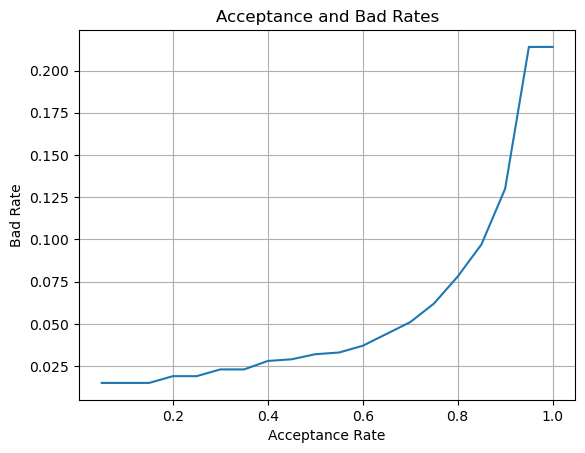

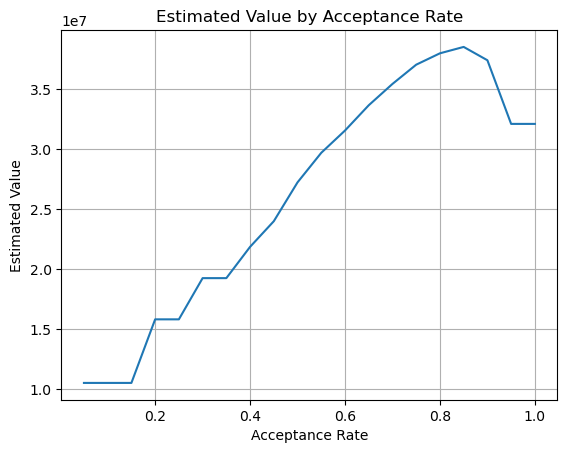

,Acceptance Rate,Threshold,Bad Rate,Num Accepted Loans,Avg Loan Amnt,Estimated Value
3,0.850000,0.580000,0.097000,5016,"$9,518.92","$38,484,003.59"


In [160]:
plt.plot(strat_df['Acceptance Rate'], strat_df['Bad Rate'])
plt.xlabel('Acceptance Rate')
plt.ylabel('Bad Rate')
plt.title('Acceptance and Bad Rates')
plt.grid()
plt.show()


# Create a line plot of estimated value
plt.plot(strat_df['Acceptance Rate'], strat_df['Estimated Value'])
plt.title('Estimated Value by Acceptance Rate')
plt.xlabel('Acceptance Rate')
plt.ylabel('Estimated Value')
plt.grid()
plt.show()

# Print the row with the max estimated value
strat_df.loc[strat_df['Estimated Value'] == np.max(strat_df['Estimated Value'])].style.format({"Avg Loan Amnt": "${:,.2f}", "Estimated Value": "${:,.2f}"})

As expected the bad rate increases as we increase our acceptance rate. 

In [161]:
# Calculate the bank's expected loss and assign it to a new column
pred_df['expected_loss'] = pred_df['prob_default'] * 1 * pred_df['loan_amount']

# Calculate the total expected loss to two decimal places
total_exp_loss = round(np.sum(pred_df['expected_loss']),2)

# Print the total expected loss
print('Total expected loss: ', '${:,.2f}'.format(total_exp_loss))

Total expected loss:  $13,351,737.00
